In [21]:
# Load modules
import sys
sys.path.append('../mapplot/')

import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
import psyplot.project as psy
import pandas as pd
import xarray
from netCDF4 import Dataset,date2num
import xarray as xr

from timefunctions import *
import varfunctions as vf
import locfunctions as lf
import datetime as dt

from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray

In [22]:
###############################################################################################
## CONSTANT FILE  ##
c_filename = "lfff00000000c.nc"
filepath = '/store/s83/swester/teamx/tdf_2019091212/output/19091212/'
const_file = filepath + c_filename
data_c = psy.open_dataset(const_file)

###############################################################################################
## DECIDE ##
# where to save
plotpath_base = '/scratch/tlezuo/icon-vis/lidar/data/'
# decide which locations to calculate
loc_list = []
# loc_list.extend([])
loc_list=[lf.kols]

# decide which variables to calculate
pvars_list = []
# pvars_list.extend([vf.qv_2m,vf.T_2M])
pvars_list= [vf.U, vf.V, vf.T, vf.QV,vf.P,vf.VEL,vf.DIR]

###############################################################################################
## DATELISTS ##
# ICON model: as writeout times: 30 min
startdate_model = dt.datetime(2019,9,13,00,00)
enddate_model = dt.datetime(2019,9,14,00,00)
plotdates_model = pd.date_range(startdate_model,enddate_model,freq='0h30min')
# radiosoundings: 3h and 2h intervals
plotdates_rs = [dt.datetime(2019,9,12,23,00),dt.datetime(2019,9,13,3,00),dt.datetime(2019,9,13,6,00),dt.datetime(2019,9,13,9,00),
dt.datetime(2019,9,13,11,00),dt.datetime(2019,9,13,13,00),dt.datetime(2019,9,13,15,00),dt.datetime(2019,9,13,17,00),dt.datetime(2019,9,13,20,00),dt.datetime(2019,9,13,23,00)]
# lidar SR88: 10 min
plotdates_lidar = pd.date_range(startdate_model,enddate_model,freq='0h10min')


In [23]:
## LOAD DATA ##
loc=lf.kols
# ICON model
lidar_data_model = np.load('lidar_data_'+loc.name+'.npy',allow_pickle='TRUE').item()
# radiosoundings
lidar_data_rs = np.load('lidar_data_obs_'+loc.name+'.npy',allow_pickle='TRUE').item()
# Streamline Lidar SR88
lidar_data_lidar = xr.open_dataset('/users/tlezuo/icon-vis/vertical_profile/lidar_data_lidar_Kolsass.nc').load()
lidar_data_lidar = lidar_data_lidar.transpose()

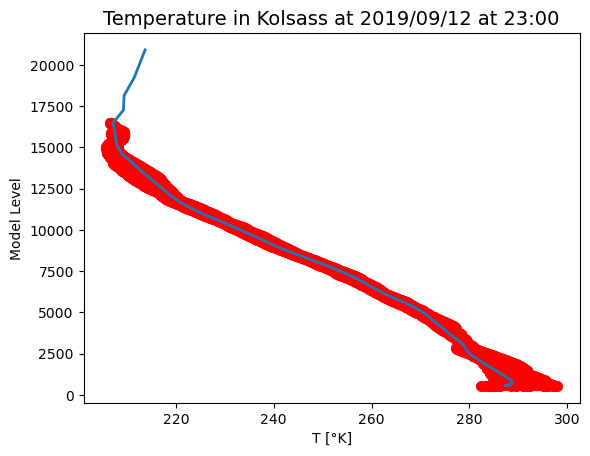

In [24]:
## PLOT SINGLE PROFILE ##
pvar=vf.T
pdate=dt.datetime(2019,9,12,23,00)

# Create plot of var_coord
f, axes = plt.subplots(1,1)                                                                                              
ax = axes                                                                                                                
h = ax.plot(lidar_data_model[pvar.name][0,:],  lidar_data_model['HFL_loc'], lw=2)
h = ax.scatter(lidar_data_obs[pvar.name],  lidar_data_obs['ALT'], lw=2, color='r')
ax.set_xlabel(pvar.name+' '+pvar.units)
ax.set_ylabel('Model Level')
ax.set_title(pvar.title+' in '+loc.name + ' at ' +pdate.strftime('%Y/%m/%d at %H:%M'), fontsize=14)
# plt.ylim([0,20])
# plt.xlim([pvar.min,pvar.max]);
plt.show()

In [25]:
# a try to smooth the data, example T
kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size
data_convolved_10 = np.convolve(lidar_data_obs['T'][0], kernel, mode='same')
data_convolved_10

array([142.815, 171.53 , 200.245, ..., 165.92 , 145.195, 124.46 ])

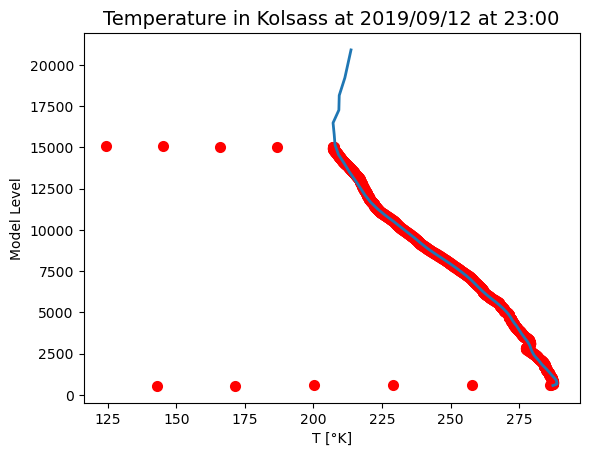

In [26]:
## PLOT SINGLE PROFILE ##
pvar=vf.T
pdate=dt.datetime(2019,9,12,23,00)

# Create plot of var_coord
f, axes = plt.subplots(1,1)                                                                                              
ax = axes                                                                                                                
h = ax.plot(lidar_data_model[pvar.name][0,:],  lidar_data_model['HFL_loc'], lw=2)
h = ax.scatter(data_convolved_10,  lidar_data_obs['ALT'][0], lw=2, color='r')
ax.set_xlabel(pvar.name+' '+pvar.units)
ax.set_ylabel('Model Level')
ax.set_title(pvar.title+' in '+loc.name + ' at ' +pdate.strftime('%Y/%m/%d at %H:%M'), fontsize=14)
# plt.ylim([0,20])
# plt.xlim([pvar.min,pvar.max]);
plt.show()

In [27]:
lidar_data_lidar

<xarray.Dataset>
Dimensions:  (time: 144, height: 83)
Coordinates:
  * time     (time) datetime64[ns] 2019-09-13 ... 2019-09-13T23:50:00
  * height   (height) float32 563.7 597.5 631.4 ... 3.27e+03 3.304e+03 3.338e+03
    datenum  (time) float64 1.815e+04 1.815e+04 ... 1.815e+04 1.815e+04
Data variables:
    u        (height, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    v        (height, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    w        (height, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    VEL      (height, time) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Name:     Lidar SL88

/scratch/tlezuo/miniconda3/envs/psyplot/lib/python3.9/site-packages/numpy/ma/core.py:2358: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = np.array(a, copy=copy, subok=True)


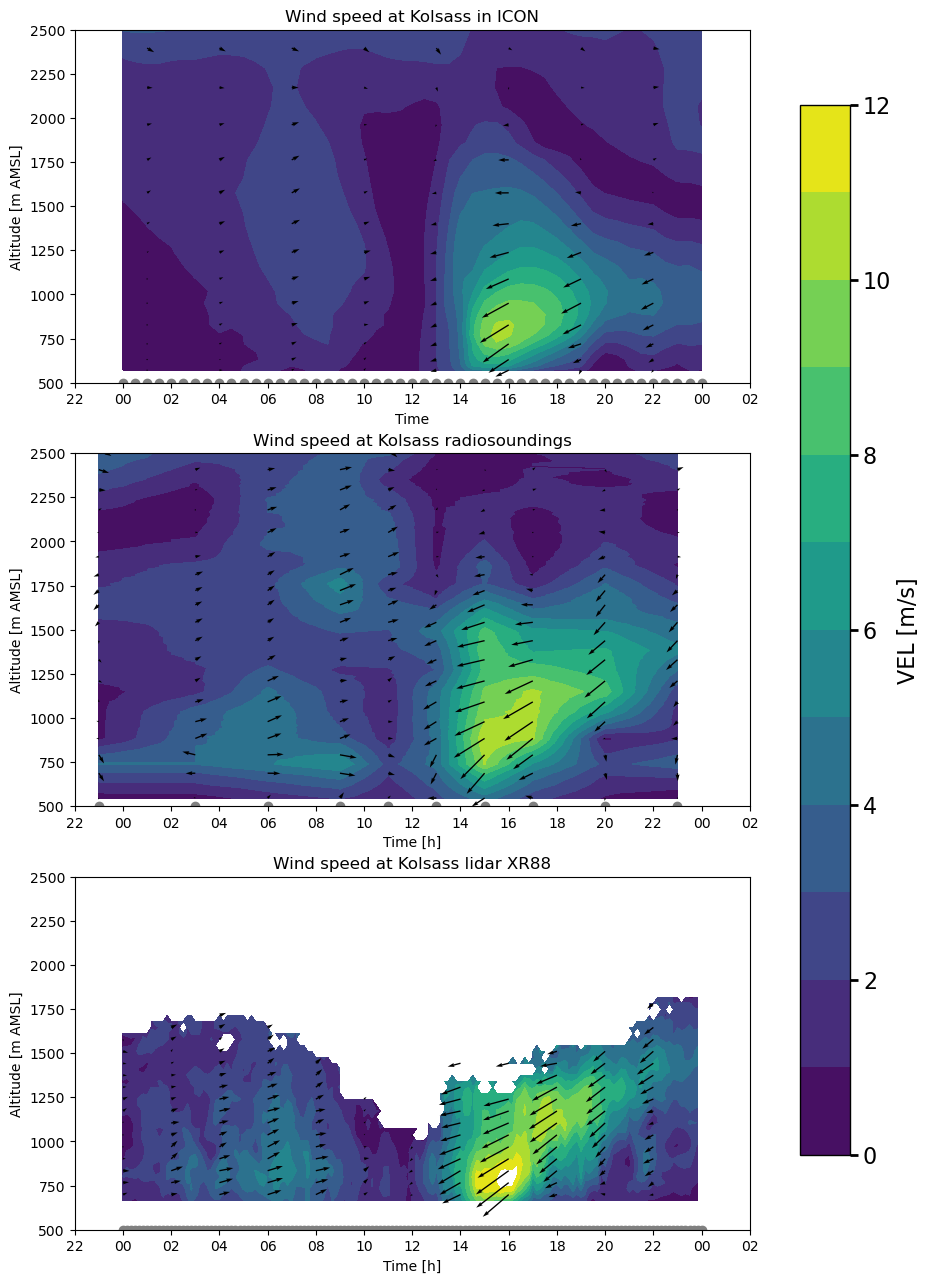

In [28]:
## PLOT 3 LIDAR PLOT MODEL + RS + LIDAR ##
# select variable
pvar=vf.VEL

# vertical range
zmin = 500
zmax = 2500

# time range
startdate_plot = dt.datetime(2019,9,12,22,00)
enddate_plot = dt.datetime(2019,9,14,2,00)
plotfreq_plot = '2h0min'
plotdates_plot = pd.date_range(startdate_plot,enddate_plot,freq=plotfreq_plot)

# colorscale levels
levels = np.arange(pvar.min,pvar.max,pvar.ticks)
# h2500
if zmax == 2500:
        if pvar.name == 'T':
                levels = np.arange(285,306,2)
        if pvar.name == 'VEL':
                levels = np.arange(0,13,1)

# figure settings
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,15))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.2)

# windbarb settings
q_scale = 30
q_width = 0.002

##################################################################################################
## MODEL ##
x1 = plotdates_model
y1 = lidar_data_model['HFL_loc']
z1 = np.transpose(lidar_data_model[pvar.name])
u1 = np.transpose(lidar_data_model['U'])
v1 = np.transpose(lidar_data_model['V'])

# data for windbarbs only at sounding timesteps
x_w =pd.DatetimeIndex(['2019-09-13 03:00:00','2019-09-13 06:00:00','2019-09-13 09:00:00','2019-09-13 11:00:00',
'2019-09-13 13:00:00','2019-09-13 15:00:00','2019-09-13 17:00:00','2019-09-13 20:00:00','2019-09-13 23:00:00'],
dtype='datetime64[ns]', freq=None) 
y_w = y1
z_w = z1[[5,11,17,21,25,29,33,39,45],:]
u_w = u1[[5,11,17,21,25,29,33,39,45],:]
v_w = v1[[5,11,17,21,25,29,33,39,45],:]

#create plot
# colormap
cf = ax1.contourf(x1,y1,z1, levels = levels, cmap=pvar.cmap)
# windbarbs
dx1 = 6 # dx/2= hours for model
dy1 = 2
ax1.quiver(x1[2::dx1], y1[::dy1], u1[::dy1, 2::dx1], v1[::dy1, 2::dx1], 
        scale=q_scale, scale_units='inches', width=q_width)   
# ax1.quiver(x_w[2::dx], y[::dy], u[::dy, 2::dx], v[::dy, 2::dx], 
#         scale=q_scale, scale_units='inches', width=q_width)   
# ax1.quiver(x_w, y_w[::dy], u_w[::dy, :], v_w[::dy, :], 
#         scale=q_scale, scale_units='inches', width=q_width)    
# datapoints
ax1.scatter(plotdates_model,np.full((len(plotdates_model),1),500),color='grey')

# plotting options
ax1.set_ylim(zmin,zmax)
ax1.set_xlim(startdate_plot,enddate_plot)
# ax1.grid()
ax1.set_title(pvar.title+' at '+loc.name+ ' in ICON')
ax1.set_xlabel('Time')
ax1.set_xticks(plotdates_plot)
ax1.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])
ax1.set_ylabel('Altitude [m AMSL]')

##################################################################################################
## OBS RS ##
# set data
x2 = plotdates_rs
y2 = lidar_data_obs['ALT'][0]
z2 = np.transpose(lidar_data_obs[pvar.name])
u2 = np.transpose(lidar_data_obs['U'])
v2 = np.transpose(lidar_data_obs['V'])

#create plot
# colormap
cf = ax2.contourf(x2,y2,z2, levels = levels, cmap=pvar.cmap)
# windbarbs 
dy2 = 10 # large distance for rs
ax2.quiver(x2, y2[::dy2], u2[::dy2, :], v2[::dy2, :], 
        scale=q_scale, scale_units='inches', width=q_width)
# datapoints
ax2.scatter(plotdates_rs,np.full((len(plotdates_rs),1),500),color='grey')

# plotting options
ax2.set_ylim(zmin,zmax)
ax2.set_xlim(startdate_plot,enddate_plot)
# ax2.grid()
ax2.set_title(pvar.title+' at '+loc.name+ ' radiosoundings')
ax2.set_xlabel('Time [h]')
ax2.set_xticks(plotdates_plot)
ax2.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])
ax2.set_ylabel('Altitude [m AMSL]')

##################################################################################################
## OBS lidar ##
# set data

x3 = lidar_data_lidar.time
y3 = lidar_data_lidar.height
x3, y3 = np.meshgrid(x3,y3)
z3 = lidar_data_lidar.VEL
u3 = lidar_data_lidar.u.data
v3= lidar_data_lidar.v.data

#create plot
# colormap
cf = ax3.contourf(x3,y3,z3, levels = levels, cmap=pvar.cmap)
# windbarbs 
dx3 = 12
dy3 = 2
ax3.quiver(x3[::dy3,::dx3], y3[::dy3,::dx3], 
        u3[::dy3,::dx3], #U
        v3[::dy3,::dx3], #V
        scale=q_scale, scale_units='inches',
        width=q_width)
# datapoints
ax3.scatter(plotdates_lidar,np.full((len(plotdates_lidar),1),500),color='grey')

# plotting options
ax3.set_ylim(zmin,zmax)
ax3.set_xlim(startdate_plot,enddate_plot)
# ax3.grid()
ax3.set_title(pvar.title+' at '+loc.name+ ' lidar XR88')
ax3.set_xlabel('Time [h]')
ax3.set_xticks(plotdates_plot)
ax3.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])
ax3.set_ylabel('Altitude [m AMSL]')


##################################################################################################
# add colorbar 
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(cf, cax=cbar_ax)
# cbar = plt.colorbar(cf,orientation='vertical')
cbar.ax.tick_params(labelsize=16,width=2,length=6)
cbar.set_label(pvar.name+' '+pvar.units,fontsize=16)
cbar.outline.set_linewidth(1)

In [29]:
ldobs= np.transpose(lidar_data_obs['U'])
ldobs

Magnitude,[[-0.21130913087034972 -0.5346039145130207 0.9547977040874976 ... -2.2951314143112853 -0.15628335990023734 -0.19405914525519935] [-0.03663516937006068 -0.7650438047704285 1.2778168160756689 ... -2.5605001578317412 -0.08715574274765817 -0.20601522996402166] [0.15643446504023112 -1.0759623608071864 1.6617774435648518 ... -2.89293574575349 -0.019197647081011866 -0.16538241349019953] ... [14.066341902371175 10.132058295902388 6.039283357484062 ... 17.364595932847955 14.885912696499036 16.452133065434666] [13.712195531829709 10.257922374112356 6.039283357484062 ... 17.152901309485564 14.455302731856007 16.19771863658774] [13.35835956994307 10.383786452322322 6.039283357484062 ... 17.152901309485564 14.215712078841818 15.94330420774081]]
Units,meter/second
